In [1]:
import numpy as np 
import random 
import scipy.stats as stats 
import matplotlib.pyplot as plt

In [2]:
#Случайная величина на отрезке от 0 до 1
random.random()

0.25418534228481315

In [3]:
#Набор случайных величин
[random.random() for i in range(10)]

[0.3780989562006307,
 0.4424004611421809,
 0.6449222324991609,
 0.8994388604378837,
 0.08847466288253181,
 0.12003230926262454,
 0.2636836560410788,
 0.22860184529483418,
 0.3211054279902066,
 0.7554776825242845]

(array([1., 0., 2., 1., 1., 1., 3., 0., 0., 1.]),
 array([0.18460657, 0.26560888, 0.3466112 , 0.42761352, 0.50861583,
        0.58961815, 0.67062046, 0.75162278, 0.8326251 , 0.91362741,
        0.99462973]),
 <BarContainer object of 10 artists>)

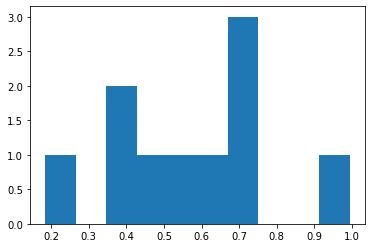

In [4]:
#Распределение 
data = [random.random() for i in range(10)]
plt.hist(data)

In [5]:
#Случайная величина из стандартного нормального распределения 
random.gauss(0,1)

-1.0486467950471172

(array([  6.,  20.,  53., 130., 209., 226., 178., 110.,  46.,  22.]),
 array([-3.11028192, -2.53373246, -1.95718301, -1.38063355, -0.80408409,
        -0.22753464,  0.34901482,  0.92556428,  1.50211373,  2.07866319,
         2.65521264]),
 <BarContainer object of 10 artists>)

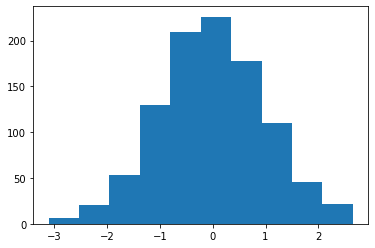

In [6]:
data = [random.gauss(0,1) for i in range(1000)]
plt.hist(data)

In [7]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `n

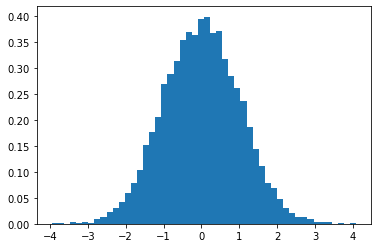

In [8]:
data = [random.gauss(0,1) for i in range (10000)]
plt.hist(data, bins = 50, density = True)
plt.show()

In [9]:
gaussian = stats.norm(0,1)

In [10]:
gaussian.pdf(0)

0.3989422804014327

In [11]:
x = [item for item in range(-4,5)]
x

[-4, -3, -2, -1, 0, 1, 2, 3, 4]

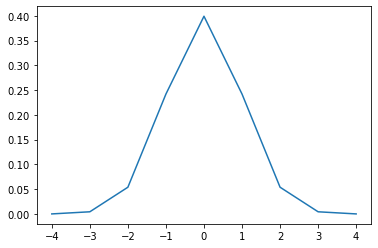

In [12]:
data = [gaussian.pdf(item) for item in x]
plt.plot(x,data)

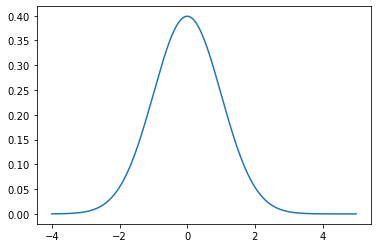

In [13]:
x = [item/100 for item in range(-400,500)]
data = [gaussian.pdf(item) for item in x]
plt.plot(x,data)

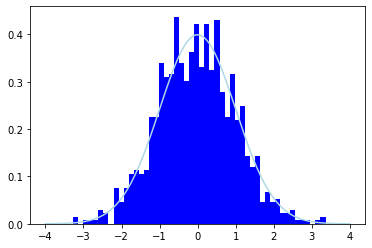

In [14]:
#Теоретическая + выборочная функция распределения 
sample_dict = [random.gauss(0,1) for i in range(1000)]
plt.hist(sample_dict, bins = 50, density = True, color = 'blue')

x = [item/100 for item in range (-400,401)]
theory_dist = [gaussian.pdf(item) for item in x]
plt.plot(x, theory_dist, color = 'lightblue')
plt.show()

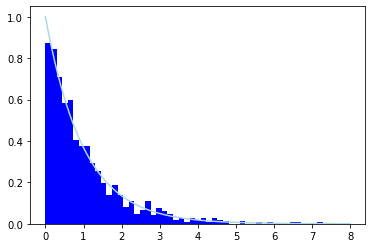

In [17]:
#Экспоненциальное распределение
sample_dist = np.random.exponential(1,1000)
plt.hist(sample_dist, bins = 50, density = True, color = 'blue')

x = [item/100 for item in range(0,800)]
theory_dist = [stats.expon.pdf(item) for item in x]
plt.plot(x, theory_dist, color = 'lightblue')

plt.show()

In [19]:
#вычисление процентилей 
data = [random.gauss(0,1) for i in range(10000)]
percentile_10 = sorted(data)[int(len(data)*0.1)]
percentile_10

-1.2726835329778707

In [20]:
#Функция для вычисления десятого перцентиля 
def percentile(data,x):
    return sorted (data)[int(len(data)*x/100)]
data = [random.gauss(0,1) for i in range(10000)]
percentile_10 = percentile(data,10)
percentile_10

-1.2385356129867835

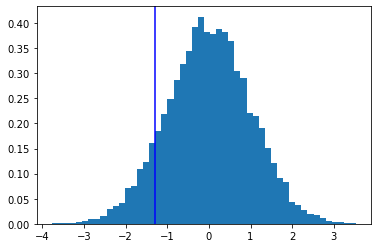

In [22]:
data = [random.gauss(0,1) for i in range(10000)]
percentile_10 = percentile(data,10)

plt.hist(data, bins = 50, density = True)
plt.axvline(x=percentile_10, color = 'blue')
plt.show()

[]

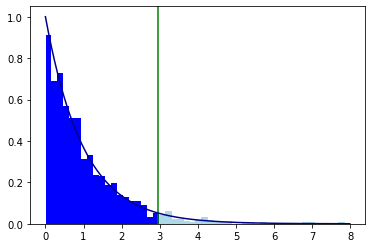

In [23]:
#Отсечка 95 
sample_dist = np.random.exponential(1,1000)
n, bins, patches = plt.hist(sample_dist, bins=50, density = True, color = 'blue')

sample_percentile_10 = np.percentile(sample_dist, 95)
plt.axvline(x=sample_percentile_10, color = 'green')

for patch in patches:
    if patch.xy[0] > sample_percentile_10:
        patch.set_color('lightblue')

x = [item/100 for item in range (0,800)]
theory_dist = [stats.expon.pdf(item) for item in x]
plt.plot(x, theory_dist, color = 'darkblue')

plt.plot()

# Симуляция Монте-Карло

In [24]:
def mc_iteration():
    summ = 0
    for i in range(10):
        summ += random.random()
    return summ

data = []
for i in range(10000):
    data.append(mc_iteration())

(array([0.002181  , 0.02274474, 0.09035581, 0.24177968, 0.38962048,
        0.40660114, 0.26390128, 0.10609018, 0.03053403, 0.00405043]),
 array([1.75530696, 2.39721367, 3.03912038, 3.68102709, 4.3229338 ,
        4.96484052, 5.60674723, 6.24865394, 6.89056065, 7.53246736,
        8.17437407]),
 <BarContainer object of 10 artists>)

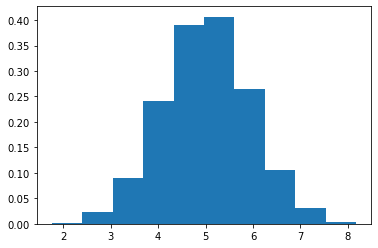

In [25]:
plt.hist(data, density = True)

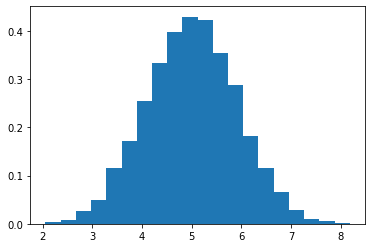

In [26]:
data = []
for i in range(10000):
    iteration = np.sum(np.random.uniform(0,1,10))
    data.append(iteration)
    
plt.hist(data, bins = 20, density = True)
plt.show()

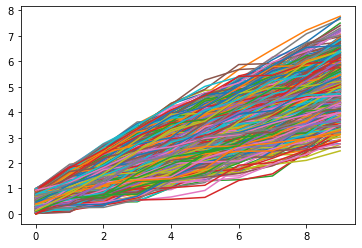

In [28]:
def mc_iteration():
    summ_trajectory = []
    summ = 0
    for i in range(10):
        summ += random.random()
        summ_trajectory.append(summ)
    plt.plot(summ_trajectory)
    return summ

for i in range(1000):
    mc_iteration()

plt.show()

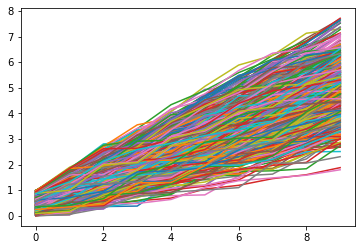

In [29]:
#Симулированные данные 
def mc_iteration():
    event_sum = 0
    event_trajectory = []
    for i in range(10):
        event = np.random.uniform(0,1)
        event_sum += event
        event_trajectory.append(event_sum)
        
    plt.plot(event_trajectory)
    return event_sum
data = []
for i in range(1000):
    iteration = mc_iteration()
    data.append(iteration)